# **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss,confusion_matrix,classification_report

# **2. Import Data**

In [4]:
df_train = pd.read_csv('train.tsv', sep='\t')
print("Train dataset shape: ", df_train.shape)
df_train.head()

Train dataset shape:  (7395, 27)


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
df_test = pd.read_csv('test.tsv', sep='\t')
print("Test dataset shape: ", df_test.shape)
df_test.head()

Test dataset shape:  (3171, 26)


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,...,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,...,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,...,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,...,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,...,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


# **3. Data Exploration**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [7]:
df_train.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,...,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,...,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,...,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,...,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,...,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,...,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             3171 non-null   object 
 1   urlid                           3171 non-null   int64  
 2   boilerplate                     3171 non-null   object 
 3   alchemy_category                3171 non-null   object 
 4   alchemy_category_score          3171 non-null   object 
 5   avglinksize                     3171 non-null   float64
 6   commonlinkratio_1               3171 non-null   float64
 7   commonlinkratio_2               3171 non-null   float64
 8   commonlinkratio_3               3171 non-null   float64
 9   commonlinkratio_4               3171 non-null   float64
 10  compression_ratio               3171 non-null   float64
 11  embed_ratio                     3171 non-null   float64
 12  framebased                      31

In [9]:
df_test.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.0,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,5231.717124,2.968182,0.467111,0.207704,0.089960,0.047845,2.375620,-0.106485,0.0,0.058089,0.022390,0.235723,0.257211,0.640492,29.993693,5698.972564,169.583412,4.787764,0.168745,0.101621
std,3054.569996,19.536725,0.199111,0.144784,0.094182,0.071556,5.879138,0.311377,0.0,0.043265,0.147973,0.054393,1.323941,0.479932,20.626985,10726.102405,145.842805,3.142271,0.182017,0.082189
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.046925,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2536.500000,1.610350,0.339454,0.100000,0.019608,0.000000,0.441972,0.000000,0.0,0.028866,0.000000,0.201739,0.023005,0.000000,14.000000,1514.000000,77.000000,3.000000,0.036145,0.067272
50%,5229.000000,2.065476,0.478261,0.191919,0.064935,0.019685,0.481728,0.000000,0.0,0.048302,0.000000,0.233212,0.076087,1.000000,25.000000,3391.000000,135.000000,5.000000,0.108696,0.088861
75%,7865.500000,2.576541,0.611270,0.293978,0.131962,0.062794,0.586843,0.000000,0.0,0.074899,0.000000,0.263529,0.222222,1.000000,42.000000,6229.000000,218.500000,7.000000,0.239316,0.112139
max,10564.000000,1062.000000,1.000000,0.857143,0.734932,0.696802,21.000000,0.928571,0.0,0.375000,1.000000,0.678877,29.000000,1.000000,100.000000,331764.000000,1626.000000,19.000000,1.000000,1.000000


**Creating another dataframe with urlid for making submission file**

In [10]:
url = df_test['urlid']

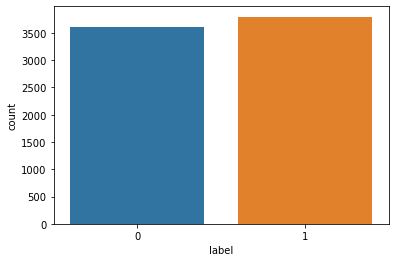

In [11]:
sns.countplot(df_train.label)

### **Conclusion-**

**1. Train Data-**

- Shape : (7395,27)
- **No null** values present
- Dtype - **Object : 6, Numerical : 21**
- Features like - **alchemy_category_score, is_news and news_front_page** are of object data type even after having numerical values.
- Column - **framebased** has **only one** value which equals to zero.

**2. Test Data-**

- Shape : (3171,26)
- **No null** values present
- Dtype - **Object : 6, Numerical : 21**
- Features like - **alchemy_category_score, is_news and news_front_page** are of object data type even after having numerical values.
- Column - **framebased** has **only one** value which equals to zero.

**3. Dataset is Balanced**

# **4. Data Preprocessing**

## 4.1 For Train Dataset

Let's check for the columns - alchemy_category, alchemy_category_score, is_news, new_front_page.

In [12]:
df_train['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

**Conclusion -**
- Here we can see that **?** is the indifferent string value with a count of 2342 which is a big value and we cannot assign any other value to this. So, we will drop this column. 

In [13]:
df_train['alchemy_category_score'].value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.309071        1
0.611926        1
0.770075        1
0.775669        1
0.550798        1
Name: alchemy_category_score, Length: 4806, dtype: int64

**Conclusion -**
- Here we can see that **?** is the only string value with a count of 2342 which is a big value and we cannot assign any other value to this. So, we will drop this column. 

In [14]:
df_train['news_front_page'].value_counts()

0    5853
?    1248
1     294
Name: news_front_page, dtype: int64

**Conclusion -**
- Here we can see that **?** is the only string value with a count of 1248 which is a big value and it is tough to decide what value. So, we will drop this column. 

In [15]:
df_train['is_news'].value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

**Conclusion -**
- Here we can see that **?** is the only string value with a count of 2843. And other value is **1**. Considering that other value might be **0**. So we will replace **?** with **0**.

In [16]:
df_train['is_news'] = np.where(df_train['is_news']=='?', 0, 1)

In [17]:
df_train = df_train.drop('alchemy_category',axis=1)
df_train = df_train.drop('alchemy_category_score',axis=1)
df_train = df_train.drop('news_front_page',axis=1)

## 4.2 For Test Dataset

In [18]:
df_test['is_news'] = np.where(df_test['is_news']=='?', 0, 1)

In [19]:
df_test = df_test.drop('alchemy_category',axis=1)
df_test = df_test.drop('alchemy_category_score',axis=1)
df_test = df_test.drop('news_front_page',axis=1)

# **5. Feature Selection**

## **5.1 For Train Dataset**

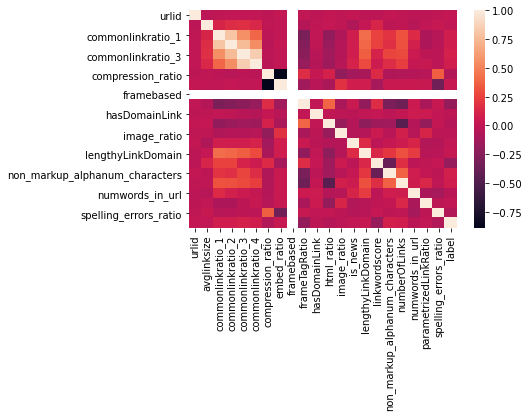

In [20]:
sns.heatmap(df_train.corr())

- Columns like url and urlid are not so significant so we can drop them.
- Feature - framebased can be dropped as well since it has only one value. 
- We should retain the rest of the features as it is clear from the heatmap that all the features are moderately or highly correlated with the target variable.

In [21]:
df_train = df_train.drop('url',axis=1)
df_train = df_train.drop('urlid',axis=1)
df_train = df_train.drop('framebased',axis=1)

In [22]:
df_train.shape

(7395, 21)

## **5.2 For Test Dataset**

In [23]:
df_test = df_test.drop('url',axis=1)
df_test = df_test.drop('urlid',axis=1)
df_test = df_test.drop('framebased',axis=1)

In [24]:
df_test.shape

(3171, 20)

### Separating Target Feature from Dataset

In [25]:
y = df_train.pop('label')

### **Cleaning Feature boilerplate for Train Dataset**

In [26]:
df_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_train['boilerplate']=df_train['boilerplate'].str.lower()

In [27]:
ps = PorterStemmer()
data = []
for i in range(7395):
    review = re.sub('[^a-zA-Z]', ' ', df_train['boilerplate'][i]) 
    review = nltk.word_tokenize(review)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_word = TfidfVectorizer(lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
vect_char = TfidfVectorizer( lowercase=True, analyzer='char',
                        stop_words= 'english',ngram_range=(3,6),dtype=np.float32)

In [29]:
from scipy import sparse
train_vect = vect_word.fit_transform(data)
train_vect_char = vect_char.fit_transform(data)

In [30]:
X = sparse.hstack([train_vect, train_vect_char])

### **Cleaning Feature boilerplate for Test Dataset**

In [31]:
df_test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_test['boilerplate']=df_test['boilerplate'].str.lower()

In [32]:
ps = PorterStemmer()
data1 = []
for i in range(3171):
    review = re.sub('[^a-zA-Z]', ' ', df_test['boilerplate'][i])   
    review = nltk.word_tokenize(review)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data1.append(review)

In [33]:
test_vect = vect_word.transform(data1)
test_vect_char = vect_char.transform(data1)

In [34]:
x_test = sparse.hstack([test_vect, test_vect_char])

# **6. Model Building**

## **6.1 Train Test Split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## **6.2 Model Selection**

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1,max_iter=10000,dual=False)
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc'))))
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("ROC_AUC :", roc_auc_score(y_test, y_pred))

### KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeigh = KNeighborsClassifier(n_neighbors=10)
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(KNeigh,X_train,y_train,cv=5,scoring='roc_auc'))))
KNeigh.fit(X_train, y_train)
y_pred = KNeigh.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("ROC_AUC :", roc_auc_score(y_test, y_pred))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(RFC,X_train,y_train,cv=5,scoring='roc_auc'))))
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("ROC_AUC :", roc_auc_score(y_test, y_pred))

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(XGB,X_train,y_train,cv=5,scoring='roc_auc'))))
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("ROC_AUC :", roc_auc_score(y_test, y_pred))

**Conclusion -**

- Logistic Regression gives the highest accuracy 
- Cross Val Score - 0.88
- ROC_AUC Score on Test Data - 0.80256719610272
- Accuracy Score on Test Data - 0.8009012699713233
- **So, Logistic Regression will be used for final model, but first we will tune the hyperparameters.**

## **6.3 Tuning Hyper parameters**

In [ ]:
params={
    'penalty' : ['l1', 'l2'],
    'C' : [1, 2],
    'solver' : ['liblinear'],
    'random_state' : [0, 1, 40]
}

grid = GridSearchCV(lr, param_grid=params, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

## **6.4 Building Final Model**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(C=2, penalty='l2', random_state=0, solver='liblinear', class_weight='balanced')
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='roc_auc'))))
model.fit(X_train,y_train)
 
y_pred = model.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score : ", roc_auc_score(y_test,y_pred))

Cross Val Score: 0.88
Accuracy Score :  0.7996722654649734
ROC_AUC Score :  0.8015595568536934


In [38]:
print('\nConfusion matrix\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Confusion matrix
 [[1040  149]
 [ 340  912]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1189
           1       0.86      0.73      0.79      1252

    accuracy                           0.80      2441
   macro avg       0.81      0.80      0.80      2441
weighted avg       0.81      0.80      0.80      2441



## **6.5 Creating Submission File**

In [44]:
y_pred = model.predict(x_test)

In [45]:
predictions = {'urlid':url,'label':y_pred}

In [46]:
predictions_df = pd.DataFrame(predictions)

In [47]:
predictions_df.head(10)

,urlid,label
0,5865,1
1,782,0
2,6962,0
3,7640,0
4,3589,1
5,6719,0
6,3905,0
7,9841,1
8,7447,0
9,4776,0


In [49]:
predictions_df.to_csv('submission_file.csv',index=False)
print("File created!")

File created!
